<a target="_blank" href="https://colab.research.google.com/github/kerryback/mgmt638/blob/main/notebooks/09_more_ml.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# More Machine Learning

### More Machine Learning
### Kerry Back, JGSB, Rice University

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
colors = sns.color_palette()

## An example of overfitting with a random forest

### A nonlinear model with noise

In [2]:
# Nonlinear model
def curve(x):
    return 2 * np.sin(2 * x)

# Generate data
np.random.seed(0)
x = np.random.uniform(low=-2, high=2, size=100)
x = np.sort(x)
y = curve(x) + np.random.normal(size=100)
X = x.reshape(-1, 1)

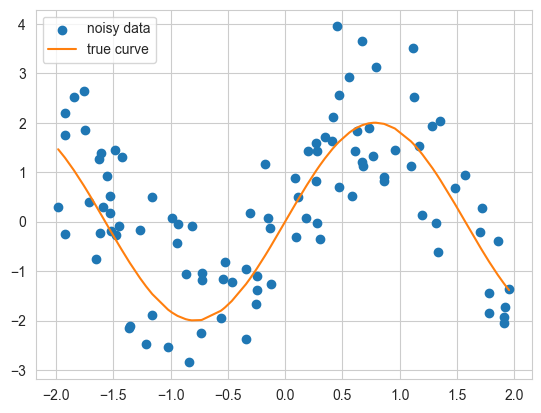

In [3]:
# View data
plt.scatter(x, y, label="noisy data")
plt.plot(x, curve(x), label="true curve", c=colors[1])
plt.legend()
plt.show()

### A shallow random forest

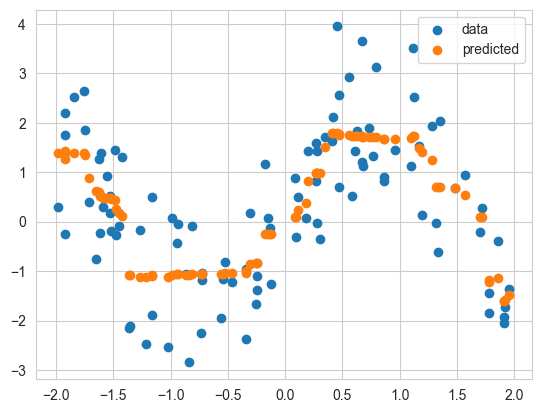

In [4]:
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor(max_depth=3, random_state=0)
forest1.fit(X=X, y=y)
predict1 = forest1.predict(X=X)
plt.scatter(x, y, label="data")
plt.scatter(x, predict1, label="predicted")
plt.legend()
plt.show()

### $R^2$ of the model

In [5]:
print(f"R squared is {forest1.score(X=X, y=y): .2%}")

R squared is  67.63%


### A More Complex Model

Set max_depth higher.

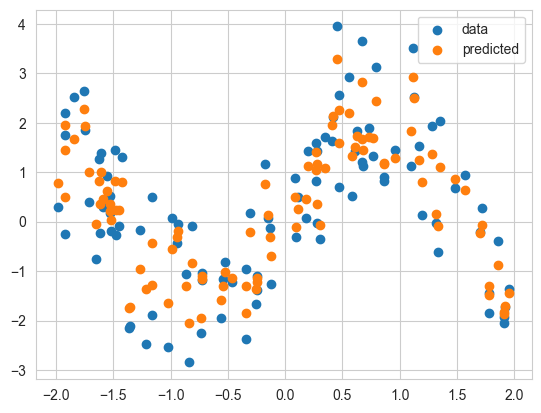

In [8]:
forest2 = RandomForestRegressor(max_depth=20, random_state=0)
forest2.fit(X=X, y=y)
predict2 = forest2.predict(X=X)
plt.scatter(x, y, label="data")
plt.scatter(x, predict2, label="predicted")
plt.legend()
plt.show()

In [10]:
print(f"R squared of more complex model is {forest2.score(X=X, y=y):.2%}")

R squared of more complex model is 90.89%


### Apply the models to new data

In [11]:
np.random.seed(0)
xnew = np.random.uniform(low=-2, high=2, size=50)
ynew = curve(xnew) + np.random.normal(size=50)
Xnew = xnew.reshape(-1, 1)

print(f"R-squared of model 1 on new data is {forest1.score(X=Xnew, y=ynew):.2%}")
print(f"R-squared of model 2 on new data is {forest2.score(X=Xnew, y=ynew):.2%}")

R-squared of model 1 on new data is 62.20%
R-squared of model 2 on new data is 54.81%


## Avoid overfitting

### Train, validate, test

- Split data into three sets: train, validate, and test
- For each hyperparameter in some set of possible choices,
  - Train on the training data
  - Compute $R^2$ on the validation data
  - Choose the hyperparameter value that performs best on the validation data
  - This maximizes "out of sample" performance
- To forecast performance on new data, compute the $R^2$ on the test data
- Test data was not used to choose the hyperparameter, so it provides an unbiased test.

### Cross validation

- A better method
- Split data into two sets: train and test (maybe 80% and 20%).
- The following is done by usng GridSearchCV on the training data:
  - Split the training data into five sets (could make more or fewer sets).
  - Combine four sets for training and use the fifth for validation.
  - Then choose a different one of the five sets for validation and repeat.
  - End up with five validation scores.  Average them.
  - Choose hyperparameter value with highest average validation score.
- To forecast performance on new data, compute the $R^2$ on the test data.
  

### Cross validation explained again

- Split the training data into 5 randomly chosen subsets $A, B, C, D$, and $E$.
- Use $A \cup B \cup C \cup D$ as training data and validate on $E$.  
- Then use $B \cup C \cup D \cup E$ as training data and validate on $A$.  
- Then, ..., until we have trained and validated 5 times.
- Average the 5 validation scores for each model.  
- Choose the hyperparameter value that gives the highest average validation score.  
- Then test on the testing data to estimate performance on new data.

### Train-test split

- scikit-learn has a function for randomly splitting X, y data into training and test sets
- Let's re-do the example by first generating the whole sample (x + xnew, y + ynew) and then using train-test-split

In [12]:
# Generate data
np.random.seed(0)
x = np.random.uniform(low=-2, high=2, size=150)
y = curve(x) + np.random.normal(size=150)
X = x.reshape(-1, 1)

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0
)

### Cross-validate on the training data and test on test data

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": range(2, 22, 2)}
cv = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid=param_grid,
)
cv.fit(X=X_train, y=y_train)
print(f"best hyperparameter is {cv.best_params_}")
print(f"score on the test data is {cv.score(X=X_test, y=y_test)}")

best hyperparameter is {'max_depth': 4}
score on the test data is 0.3902562772500102


## Second example

In [14]:
# Generate 50 features (predictors) and 1000 data points
np.random.seed(0)
X = pd.DataFrame(
    np.random.normal(size=(1000, 50))
)

# only the first feature will matter
y = X[0] + np.random.normal(size=1000)

### Split into train and test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [16]:
param_grid = {"max_depth": range(2, 22, 2)}
cv = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid=param_grid,
)
cv.fit(X=X_train, y=y_train)
print(f"best hyperparameter is {cv.best_params_}")
print(f"score on the test data is {cv.score(X=X_test, y=y_test)}")

best hyperparameter is {'max_depth': 2}
score on the test data is 0.4433286538475445


## Example 1 with a neural net

In [18]:
# Generate data
np.random.seed(0)
x = np.random.uniform(low=-2, high=2, size=150)
y = curve(x) + np.random.normal(size=150)
X = x.reshape(-1, 1)

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0
)

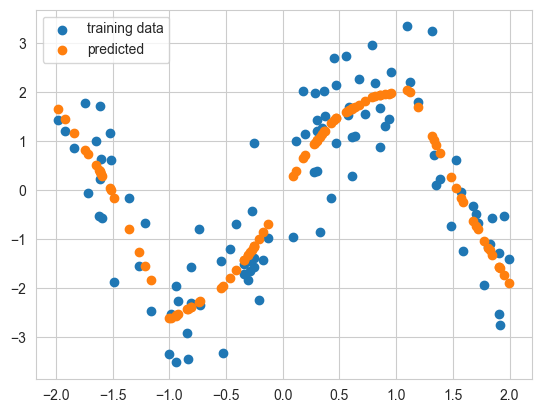

In [21]:
from sklearn.neural_network import MLPRegressor

net = MLPRegressor(hidden_layer_sizes=[100, 100, 100], random_state=0)
net.fit(X=X_train, y=y_train)
predict = net.predict(X=X_train)
plt.scatter(X_train, y_train, label="training data")
plt.scatter(X_train, predict, label="predicted")
plt.legend()
plt.show()

In [22]:
param_grid = {"hidden_layer_sizes": [[100], [100, 100], [100, 100, 100]]}
cv = GridSearchCV(
    MLPRegressor(random_state=0),
    param_grid=param_grid,
)
cv.fit(X=X_train, y=y_train)
print(f"best hyperparameter is {cv.best_params_}")
print(f"score on the test data is {cv.score(X=X_test, y=y_test)}")

c:\Users\kerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

best hyperparameter is {'hidden_layer_sizes': [100, 100]}
score on the test data is 0.4781901976045827


c:\Users\kerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Example 2 with a neural net

In [23]:
# Generate 50 features (predictors) and 1000 data points
np.random.seed(0)
X = pd.DataFrame(
    np.random.normal(size=(1000, 50))
)

# only the first feature will matter
y = X[0] + np.random.normal(size=1000)

In [36]:
file()

TypeError: 'HTTPResponse' object is not callable

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [25]:
param_grid = {"hidden_layer_sizes": [[100], [100, 100], [100, 100, 100]]}
cv = GridSearchCV(
    MLPRegressor(random_state=0),
    param_grid=param_grid,
)
cv.fit(X=X_train, y=y_train)
print(f"best hyperparameter is {cv.best_params_}")
print(f"score on the test data is {cv.score(X=X_test, y=y_test)}")

best hyperparameter is {'hidden_layer_sizes': [100]}
score on the test data is 0.1332835337054339


## Some real data

- Boston house prices
- Try to predict median house price in different neighborhoods of Boston based on characteristics of the houses and characteristics of the residents
- University of California-Irvine Machine Learning Repository and Kaggle
- See [https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data) for a description of the data.

In [39]:
url = "https://www.dropbox.com/scl/fi/g9uzsntv93waniyw9pkc2/boston.csv?rlkey=e8n7uub35p0wk2xna56ptfx23&dl=1"
df = pd.read_csv(url)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [40]:
X = df.drop(columns=["MEDV"])
y = df.MEDV

### Tasks

1.  Split into train and test
2.  Run GridSearchCV on training data to find best hyperparameter
3.  Test the model on the test data

Do this for

1.  Random forest with 

        param_grid = {"max_depth": range(2, 22, 2)}
    
2.  Neural network with 

        param_grid = {"hidden_layer_sizes": [[100], [100, 100], [100, 100, 100]]}

Can chatGPT help?